In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os

samplelist = sorted(os.listdir(path='/work2/Hi-C/Sakata_RPE/JuicerResults_20210517/'))
#samplelist.remove("logs")
samplelist.remove("ESCO2KD_1")
samplelist.remove("ESCO2KD_2")
samplelist.remove("ESCO12KD_1")
samplelist.remove("ESCO12KD_2")
samplelist.remove("SMC5KD")
samplelist

['CTCFKD_1',
 'CTCFKD_120h',
 'CTCFKD_2',
 'CTCFKD_626_628',
 'CTCFKD_72h',
 'Control_1',
 'Control_2',
 'Control_3',
 'Control_4',
 'Control_5',
 'Control_6',
 'ESCO1KD_1',
 'ESCO1KD_2',
 'JQ1_minus',
 'JQ1_plus',
 'Mau2KD',
 'NIPBLKD_1',
 'NIPBLKD_2',
 'NIPBLKD_24h',
 'NIPBLKD_48h',
 'NIPBLKD_72h',
 'NIPBLKD_si8',
 'NIPBL_Rad21_KD',
 'PDS5ABKD',
 'PDS5AKD_48h',
 'PDS5AKD_72h',
 'PDS5BKD',
 'Rad21KD_1',
 'Rad21KD_2',
 'Rad21KD_3',
 'WAPLKD']

In [2]:
df = pd.read_csv('/work2/Hi-C/Sakata_RPE/JuicerResults_20210517/Control_1/distance/distance_vs_count.10kb.MAPQ30.txt', sep="|", header=None, index_col=0)
Jdata = pd.DataFrame(columns=None, index=df.index)

for i, sample in enumerate(samplelist):
    df = pd.read_csv('/work2/Hi-C/Sakata_RPE/JuicerResults_20210517/' + sample + '/distance/distance_vs_count.10kb.MAPQ30.txt', sep="|", header=None, index_col=0)
    df = df/df.sum()
    df.columns = [sample]
    Jdata = pd.concat([Jdata, df], axis=1)

Jdata.index = [n*10000 for n in list(range(1, 25001))]
Jdata = Jdata.T

In [3]:
logJdata = np.log10(Jdata)
logJdata

/work/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,...,249910000,249920000,249930000,249940000,249950000,249960000,249970000,249980000,249990000,250000000
CTCFKD_1,-0.583213,-1.287103,-1.498207,-1.633077,-1.731051,-1.808795,-1.870656,-1.924441,-1.970366,-2.008942,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
CTCFKD_120h,-0.632691,-1.320126,-1.513637,-1.643189,-1.738988,-1.816000,-1.877402,-1.929514,-1.973729,-2.010813,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
CTCFKD_2,-0.647839,-1.334508,-1.531014,-1.660028,-1.754883,-1.831172,-1.891573,-1.943839,-1.988881,-2.026069,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
CTCFKD_626_628,-0.645920,-1.276990,-1.478768,-1.609089,-1.703018,-1.778709,-1.838139,-1.889386,-1.933371,-1.970462,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
CTCFKD_72h,-0.622957,-1.300860,-1.506627,-1.636661,-1.730642,-1.805251,-1.864353,-1.915571,-1.959146,-1.996742,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Control_1,-0.626289,-1.265572,-1.467810,-1.596512,-1.689365,-1.762263,-1.821171,-1.871351,-1.915046,-1.952266,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Control_2,-0.644026,-1.370467,-1.551027,-1.667085,-1.751177,-1.817967,-1.870904,-1.916344,-1.956037,-1.989136,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Control_3,-0.692896,-1.346436,-1.528014,-1.648241,-1.736808,-1.807785,-1.864434,-1.914048,-1.956431,-1.992492,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Control_4,-0.646275,-1.320406,-1.512694,-1.640016,-1.733709,-1.809142,-1.869771,-1.921686,-1.967042,-2.004936,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Control_5,-0.614042,-1.337572,-1.526867,-1.646088,-1.732116,-1.800837,-1.856460,-1.903520,-1.944953,-1.979641,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


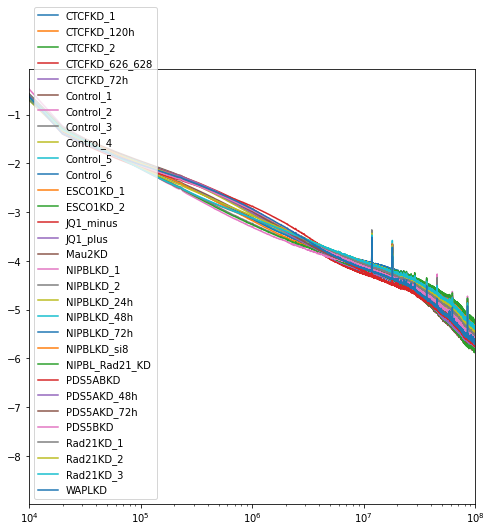

In [4]:
plt.figure(figsize=(8, 8))
for i, sample in enumerate(samplelist):
    plt.plot(logJdata.T[sample], label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
#plt.ylim(-1,1)

plt.legend(loc="lower left")

In [5]:
labels = []
labels.extend(["CTCF"] * 5)
labels.extend(["Control"] * 6)
labels.extend(["ESCO1"]*2)
labels.extend(["Control", "JQ1_plus", "Mau2"])
labels.extend(["NIPBL"] * 6)
labels.extend(["NIPBL_Rad21","PDS5AB"])
labels.extend(["PDS5A"]*2)
labels.extend(["PDS5B"])
labels.extend(["Rad21"]*3)
labels.extend(["WAPL"])
labels

['CTCF',
 'CTCF',
 'CTCF',
 'CTCF',
 'CTCF',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'ESCO1',
 'ESCO1',
 'Control',
 'JQ1_plus',
 'Mau2',
 'NIPBL',
 'NIPBL',
 'NIPBL',
 'NIPBL',
 'NIPBL',
 'NIPBL',
 'NIPBL_Rad21',
 'PDS5AB',
 'PDS5A',
 'PDS5A',
 'PDS5B',
 'Rad21',
 'Rad21',
 'Rad21',
 'WAPL']

In [6]:
Jdata["label"] = labels
logJdata["label"] = labels
logJdata

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,...,249920000,249930000,249940000,249950000,249960000,249970000,249980000,249990000,250000000,label
CTCFKD_1,-0.583213,-1.287103,-1.498207,-1.633077,-1.731051,-1.808795,-1.870656,-1.924441,-1.970366,-2.008942,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,CTCF
CTCFKD_120h,-0.632691,-1.320126,-1.513637,-1.643189,-1.738988,-1.816000,-1.877402,-1.929514,-1.973729,-2.010813,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,CTCF
CTCFKD_2,-0.647839,-1.334508,-1.531014,-1.660028,-1.754883,-1.831172,-1.891573,-1.943839,-1.988881,-2.026069,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,CTCF
CTCFKD_626_628,-0.645920,-1.276990,-1.478768,-1.609089,-1.703018,-1.778709,-1.838139,-1.889386,-1.933371,-1.970462,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,CTCF
CTCFKD_72h,-0.622957,-1.300860,-1.506627,-1.636661,-1.730642,-1.805251,-1.864353,-1.915571,-1.959146,-1.996742,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,CTCF
Control_1,-0.626289,-1.265572,-1.467810,-1.596512,-1.689365,-1.762263,-1.821171,-1.871351,-1.915046,-1.952266,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,Control
Control_2,-0.644026,-1.370467,-1.551027,-1.667085,-1.751177,-1.817967,-1.870904,-1.916344,-1.956037,-1.989136,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,Control
Control_3,-0.692896,-1.346436,-1.528014,-1.648241,-1.736808,-1.807785,-1.864434,-1.914048,-1.956431,-1.992492,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,Control
Control_4,-0.646275,-1.320406,-1.512694,-1.640016,-1.733709,-1.809142,-1.869771,-1.921686,-1.967042,-2.004936,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,Control
Control_5,-0.614042,-1.337572,-1.526867,-1.646088,-1.732116,-1.800837,-1.856460,-1.903520,-1.944953,-1.979641,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,Control


In [7]:
from scipy import stats

grouped = Jdata.groupby(Jdata['label'])
mean = grouped.mean()
sem = grouped.std()/np.sqrt(grouped.count())
ci = stats.t.interval(alpha=0.95, df=grouped.count()-1, loc=mean, scale=sem)

/work/miniconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/work/miniconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [8]:
logmean = np.log(mean.T)
logmean["Control"] 

/work/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


10000       -1.468803
20000       -3.090411
30000       -3.518717
40000       -3.797859
50000       -4.001331
               ...   
249960000        -inf
249970000        -inf
249980000        -inf
249990000        -inf
250000000        -inf
Name: Control, Length: 25000, dtype: float64

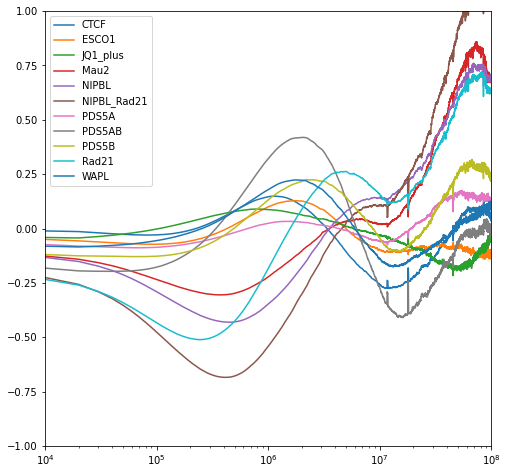

In [9]:
def moving_avg(in_x, in_y):
    np_y_conv = np.convolve(in_y, np.ones(20)/float(20), mode='valid') # 畳み込む
    out_x_dat = np.linspace(np.min(in_x), np.max(in_x), np.size(np_y_conv))

    return out_x_dat, np_y_conv

plt.figure(figsize=(8, 8))
for i, sample in enumerate(mean.index):
    if(sample == "Control"): continue
    x, y = moving_avg(logmean.index, logmean[sample] - logmean["Control"])
    plt.plot(x,y, label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-1,1)

plt.legend(loc="upper left")

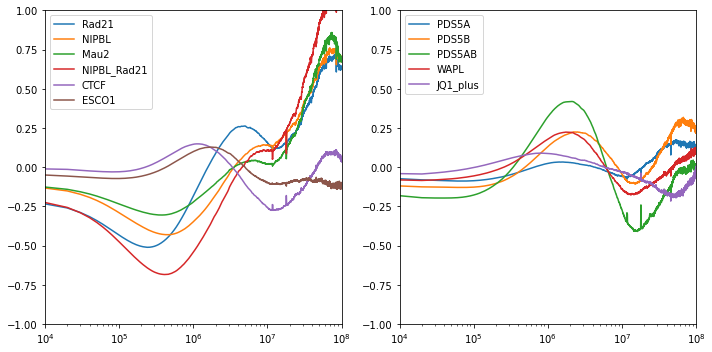

In [10]:
def moving_avg(in_x, in_y):
    np_y_conv = np.convolve(in_y, np.ones(20)/float(20), mode='valid') # 畳み込む
    out_x_dat = np.linspace(np.min(in_x), np.max(in_x), np.size(np_y_conv))

    return out_x_dat, np_y_conv

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for sample in ["Rad21", "NIPBL", "Mau2", "NIPBL_Rad21", "CTCF", "ESCO1"]:
    x, y = moving_avg(logmean.index, logmean[sample] - logmean["Control"])
    plt.plot(x,y, label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-1,1)
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
for sample in ["PDS5A", "PDS5B", "PDS5AB", "WAPL", "JQ1_plus"]:
    x, y = moving_avg(logmean.index, logmean[sample] - logmean["Control"])
    plt.plot(x,y, label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-1,1)
plt.legend(loc="upper left")

plt.tight_layout()
#plt.savefig("Figs/ContactProbability.logratio.pdf")

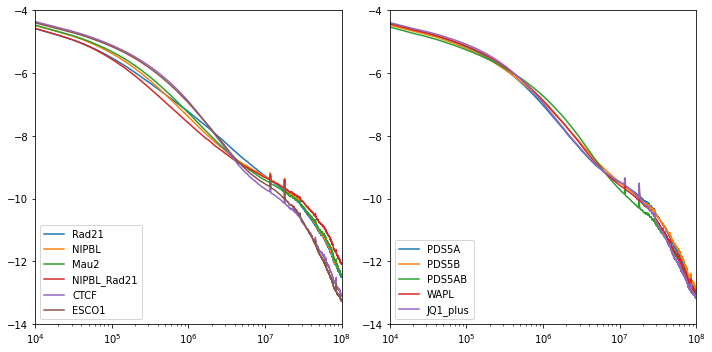

In [12]:
def moving_avg(in_x, in_y):
    np_y_conv = np.convolve(in_y, np.ones(20)/float(20), mode='valid') # 畳み込む
    out_x_dat = np.linspace(np.min(in_x), np.max(in_x), np.size(np_y_conv))

    return out_x_dat, np_y_conv

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for sample in ["Rad21", "NIPBL", "Mau2", "NIPBL_Rad21", "CTCF", "ESCO1"]:
    x, y = moving_avg(logmean.index, logmean[sample])
    plt.plot(x,y, label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-14,-4)
plt.legend(loc="lower left")

plt.subplot(1, 2, 2)
for sample in ["PDS5A", "PDS5B", "PDS5AB", "WAPL", "JQ1_plus"]:
    x, y = moving_avg(logmean.index, logmean[sample])
    plt.plot(x,y, label=sample)

plt.xscale('log')
plt.xlim(1e+4,1e+8)
plt.ylim(-14,-4)
plt.legend(loc="lower left")

plt.tight_layout()
#plt.savefig("Figs/ContactProbability.normal.pdf")

## log-scale bin

In [13]:
df = pd.read_csv('/work2/Hi-C/Sakata_RPE/JuicerResults_20210517/Control_1/distance/distance_vs_count.10kb.MAPQ30.log.txt', sep="|", header=None, index_col=0)
Jdata = pd.DataFrame(columns=None, index=df.index)

for i, sample in enumerate(samplelist):
    df = pd.read_csv('/work2/Hi-C/Sakata_RPE/JuicerResults_20210517/' + sample + '/distance/distance_vs_count.10kb.MAPQ30.log.txt', sep="|", header=None, index_col=0)
    df = df/df.sum()
    df.columns = [sample]
    Jdata = pd.concat([Jdata, df], axis=1)

def f_str(x):
    return int(str(x).split('-')[1])

Jdata.index =Jdata.index.map(f_str)
Jdata = Jdata.T
Jdata

,38,49,62,78,99,124,157,198,250,315,...,1258925410,1584893191,1995262313,2511886430,3162277659,3981071704,5011872335,6309573443,7943282346,9999999999
CTCFKD_1,0.000029,0.000112,0.000311,0.000584,0.000841,0.001179,0.002112,0.004147,0.009688,0.023631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCFKD_120h,0.000024,0.000088,0.000243,0.000470,0.000779,0.001168,0.002086,0.003670,0.007317,0.017098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCFKD_2,0.000020,0.000070,0.000206,0.000406,0.000715,0.001170,0.002257,0.004347,0.009962,0.024847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCFKD_626_628,0.000019,0.000065,0.000199,0.000400,0.000712,0.001133,0.002051,0.003337,0.006103,0.012721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCFKD_72h,0.000023,0.000090,0.000271,0.000537,0.000943,0.001494,0.002717,0.004575,0.008884,0.018945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Control_1,0.000038,0.000139,0.000365,0.000678,0.000918,0.001208,0.002004,0.003587,0.007478,0.016121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Control_2,0.000056,0.000188,0.000587,0.001073,0.001748,0.002498,0.004098,0.006445,0.012084,0.025570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Control_3,0.000042,0.000107,0.000289,0.000547,0.000918,0.001399,0.002525,0.004482,0.008880,0.018465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Control_4,0.000021,0.000069,0.000207,0.000408,0.000721,0.001171,0.002244,0.004319,0.009873,0.024481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Control_5,0.000028,0.000097,0.000263,0.000521,0.000898,0.001411,0.002591,0.004577,0.009232,0.021177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


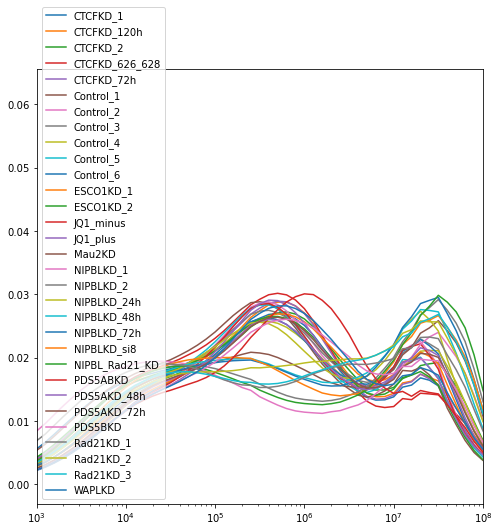

In [15]:
plt.figure(figsize=(8, 8))
for i, sample in enumerate(samplelist):
    plt.plot(Jdata.T[sample], label=sample)

plt.xscale('log')
plt.xlim(1e+3,1e+8)
#plt.ylim(-1,1)

plt.legend(loc="lower left")

In [16]:
from scipy import stats

Jdata["label"] = labels
grouped = Jdata.groupby(Jdata['label'])
mean = grouped.mean()
sem = grouped.std()/np.sqrt(grouped.count())
ci = stats.t.interval(alpha=0.95, df=grouped.count()-1, loc=mean, scale=sem)

mean.iloc[:,14:70]

/work/miniconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/work/miniconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,999,1257,1583,1994,2510,3161,3980,5010,6308,7942,...,39810716,50118722,63095733,79432822,99999999,125892540,158489318,199526230,251188642,316227765
label,,,,,,,,,,,,,,,,,,,,,
CTCF,0.003894,0.004737,0.005784,0.006943,0.008158,0.009455,0.010738,0.011978,0.013142,0.014190,...,0.014035,0.012049,0.009871,0.007517,0.005449,0.004175,0.003076,0.002028,0.000871,0.0
Control,0.003116,0.003819,0.004685,0.005646,0.006675,0.007801,0.008961,0.010114,0.011263,0.012349,...,0.015296,0.012219,0.009269,0.006882,0.005029,0.004089,0.003217,0.002250,0.001169,0.0
ESCO1,0.003542,0.004346,0.005304,0.006369,0.007480,0.008680,0.009871,0.011015,0.012128,0.013134,...,0.014160,0.011203,0.008471,0.006152,0.004480,0.003634,0.002898,0.002100,0.001020,0.0
JQ1_plus,0.002291,0.002842,0.003534,0.004327,0.005192,0.006175,0.007208,0.008272,0.009395,0.010490,...,0.013094,0.010235,0.007800,0.005994,0.004658,0.004073,0.003367,0.002505,0.001376,0.0
Mau2,0.003206,0.003989,0.004930,0.005976,0.007109,0.008341,0.009620,0.010870,0.012108,0.013275,...,0.024249,0.022323,0.019467,0.015672,0.010665,0.007435,0.004649,0.002545,0.001030,0.0
NIPBL,0.004080,0.004851,0.005835,0.006912,0.008038,0.009258,0.010483,0.011701,0.012881,0.013992,...,0.024182,0.021482,0.018223,0.014408,0.010282,0.007672,0.005423,0.003275,0.001451,0.0
NIPBL_Rad21,0.003653,0.004552,0.005634,0.006831,0.008126,0.009536,0.010938,0.012299,0.013613,0.014753,...,0.028761,0.027216,0.024707,0.020429,0.014853,0.010716,0.006977,0.003813,0.001418,0.0
PDS5A,0.002448,0.003044,0.003781,0.004626,0.005556,0.006613,0.007755,0.008953,0.010205,0.011452,...,0.017252,0.014101,0.010874,0.007974,0.005780,0.004644,0.003622,0.002519,0.001253,0.0
PDS5AB,0.002277,0.002837,0.003518,0.004313,0.005184,0.006167,0.007231,0.008315,0.009447,0.010545,...,0.012555,0.010751,0.008949,0.006744,0.005068,0.004052,0.003051,0.002055,0.001030,0.0


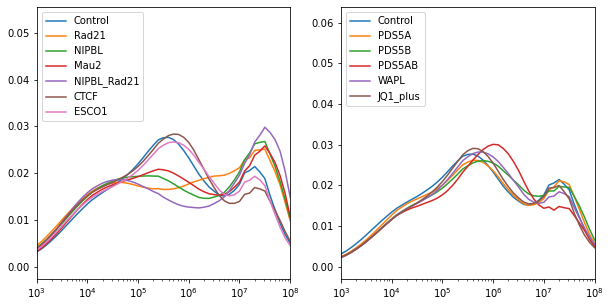

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for sample in ["Control", "Rad21", "NIPBL", "Mau2", "NIPBL_Rad21", "CTCF", "ESCO1"]:
    plt.plot(mean.T[sample], label=sample)

plt.xscale('log')
plt.xlim(1e+3,1e+8)
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
for sample in ["Control", "PDS5A", "PDS5B", "PDS5AB", "WAPL", "JQ1_plus"]:
    plt.plot(mean.T[sample], label=sample)

plt.xscale('log')
plt.xlim(1e+3,1e+8)
#plt.ylim(-1,1)
plt.legend(loc="upper left")

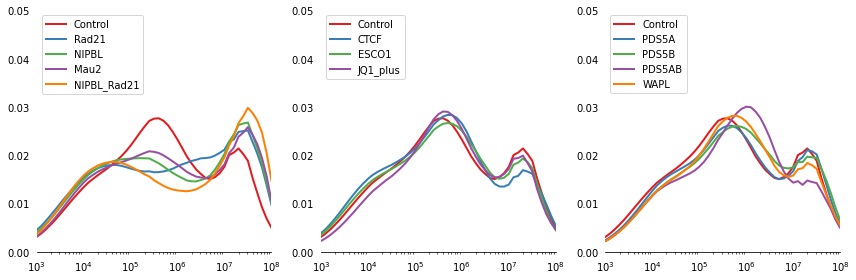

In [18]:
from cycler import cycler
c = plt.get_cmap('Set1').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=c)

def plotfunc(samples):
    for sample in samples:
        plt.plot(mean.T[sample], label=sample, linewidth=2)

    plt.xscale('log')
    plt.xlim(1e+3,1e+8)
    plt.ylim(0, 0.05)
    plt.legend(loc="upper left")
    
    # x軸y軸のtickを消す
    ax.tick_params(bottom=False, left=False)

    # 左右と上の枠を消す
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
plotfunc(["Control", "Rad21", "NIPBL", "Mau2", "NIPBL_Rad21"])

ax = plt.subplot(1, 3, 2)
plotfunc(["Control", "CTCF", "ESCO1", "JQ1_plus"])

ax = plt.subplot(1, 3, 3)
plotfunc(["Control", "PDS5A", "PDS5B", "PDS5AB", "WAPL"])

plt.tight_layout()
#plt.savefig("Figs/ContactProbability.logbin.pdf")

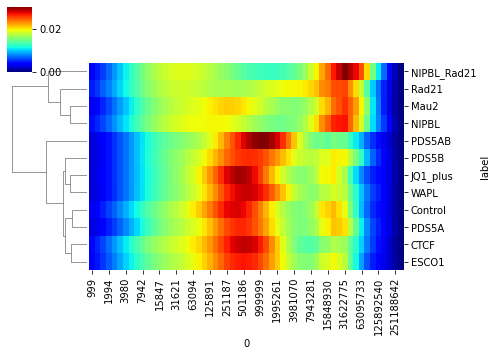

In [19]:
sns.clustermap(mean.iloc[:,14:70], cmap='jet', figsize=(7, 5), col_cluster=False)
#plt.savefig("ContactProbability.clustermap.pdf")